# logistic regression and Data-trees..
# to classify a person as survived or not in the titanic disaster

In [1]:
### Import the required packages
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
df=pd.read_csv('titanic-training-data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# analyse the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

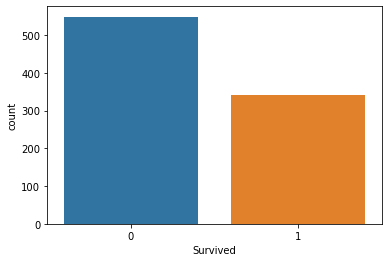

In [7]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

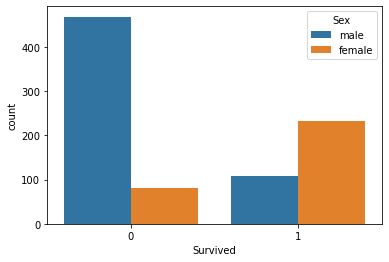

In [8]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

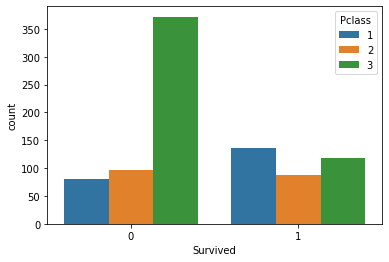

In [9]:
sns.countplot(x="Survived",hue="Pclass",data=df)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

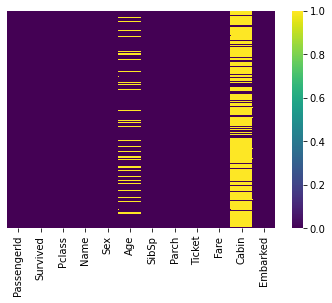

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

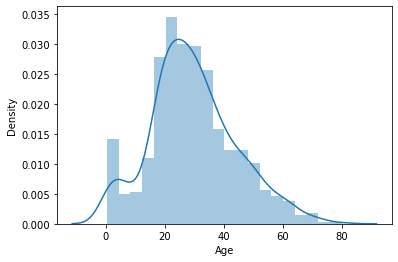

In [12]:
#lets try to fill the missing values of age
sns.distplot(df.Age)                      # a little right skewed

<AxesSubplot:xlabel='Age'>

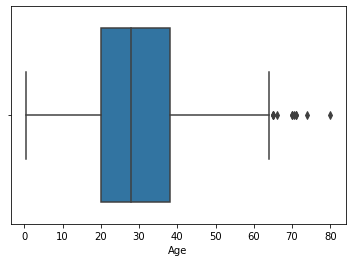

In [13]:
sns.boxplot(x="Age",data=df)  # there are a few outliers,so we'll replace with both median and mean 
                             # to see which is better

In [14]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')  #its seen that mean is better than median here..
 
df.Age = imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]
 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Sex', ylabel='Age'>

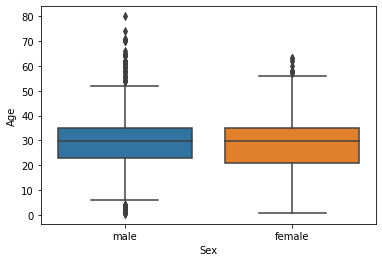

In [15]:
sns.boxplot(x="Sex",y="Age",data=df)

In [16]:
df.drop("Cabin",axis=1,inplace=True)

In [17]:
df.dropna(inplace=True)

<AxesSubplot:>

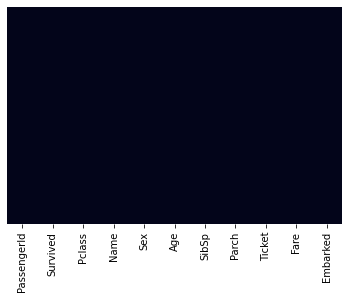

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)  #as seen , no null values.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
# as seen pclass is object data but should be classification
# and sex and embarked should be converted to numerical data

In [22]:
Sex=pd.get_dummies(df["Sex"])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)
Sex.head()  #dropping a column

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
embark=pd.get_dummies(df["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [25]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [27]:
df=pd.concat([df,Sex,embark,pcl],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [28]:
df.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass","SibSp"],axis=1,inplace=True)
df.head()

,Survived,Age,Parch,Fare,male,Q,S,2,3
0,0,22.0,0,7.2500,1,0,1,0,1
1,1,38.0,0,71.2833,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,1
3,1,35.0,0,53.1000,0,0,1,0,0
4,0,35.0,0,8.0500,1,0,1,0,1


In [29]:
corr = df.corr()
corr  #as can be seen,no corr is greater than 0.8
# but corr of survived with sibsp is very less,so,lets drop it

,Survived,Age,Parch,Fare,male,Q,S,2,3
Survived,1.000000,-0.074673,0.083151,0.255290,-0.541585,0.004536,-0.151777,0.095002,-0.320171
Age,-0.074673,1.000000,-0.178232,0.088604,0.089434,-0.012823,-0.021589,0.008416,-0.278527
Parch,0.083151,-0.178232,1.000000,0.217532,-0.247508,-0.081585,0.061512,-0.001278,0.014634
Fare,0.255290,0.088604,0.217532,1.000000,-0.179958,-0.116684,-0.163758,-0.117609,-0.411932
male,-0.541585,0.089434,-0.247508,-0.179958,1.000000,-0.075217,0.121405,-0.066459,0.134227
Q,0.004536,-0.012823,-0.081585,-0.116684,-0.075217,1.000000,-0.499261,-0.127705,0.237035
S,-0.151777,-0.021589,0.061512,-0.163758,0.121405,-0.499261,1.000000,0.190824,-0.013594
2,0.095002,0.008416,-0.001278,-0.117609,-0.066459,-0.127705,0.190824,1.000000,-0.567432
3,-0.320171,-0.278527,0.014634,-0.411932,0.134227,0.237035,-0.013594,-0.567432,1.000000


<AxesSubplot:>

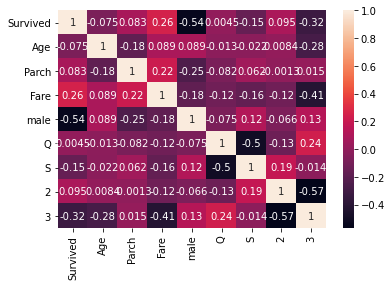

In [30]:
sns.heatmap(corr,annot=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   Parch     889 non-null    int64  
 3   Fare      889 non-null    float64
 4   male      889 non-null    uint8  
 5   Q         889 non-null    uint8  
 6   S         889 non-null    uint8  
 7   2         889 non-null    uint8  
 8   3         889 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 39.1 KB


In [32]:
df.isnull().sum()

Survived    0
Age         0
Parch       0
Fare        0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

In [33]:
#splitting the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

# logistic regression

In [36]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions=model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7902621722846442

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       167
           1       0.72      0.73      0.72       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[138,  29],
       [ 27,  73]], dtype=int64)

<AxesSubplot:>

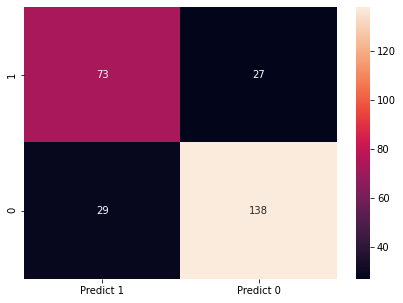

In [41]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

# DESICIONTREE

In [43]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [44]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

# as can be seen its overfitting

0.9871382636655949
0.7640449438202247


In [49]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [50]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


# reduce overfitting (Regularization)

In [81]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth =4, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))   #significantly better than previous case.

0.8456591639871383
0.8164794007490637


In [82]:
dTreeR1 = DecisionTreeClassifier(criterion = 'entropy', max_depth =6, random_state=1)
dTreeR1.fit(X_train, y_train)
print(dTreeR1.score(X_train, y_train))
print(dTreeR1.score(X_test, y_test))   #checking with entropy

0.8585209003215434
0.8239700374531835


0.8239700374531835


<AxesSubplot:>

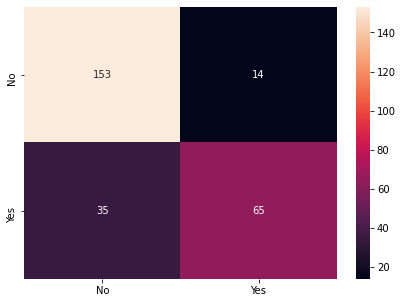

In [106]:
print(dTreeR1.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


# ENSEMBLE-Bagging

In [103]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree,n_estimators=90,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.7865168539325843


<AxesSubplot:>

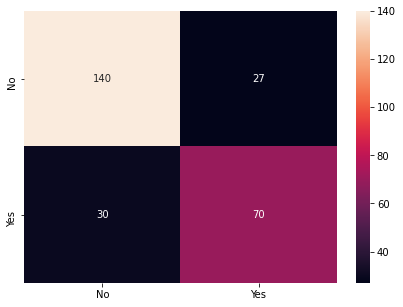

In [104]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# ENSEMBLE - Ada boosting 

In [119]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)
# no.of estimators =10 is the best choice.

0.8052434456928839


<AxesSubplot:>

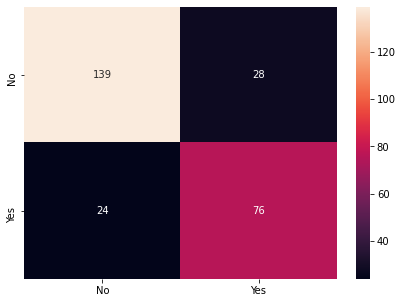

In [120]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


# ENSEMBLE -  Gradient Boosting

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.8127340823970037


<AxesSubplot:>

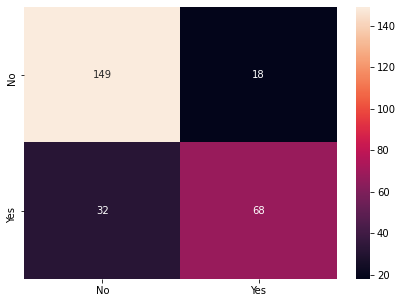

In [125]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100, random_state=1,max_features=7)
rfcl = rfcl.fit(X_train, y_train)


0.7827715355805244


<AxesSubplot:>

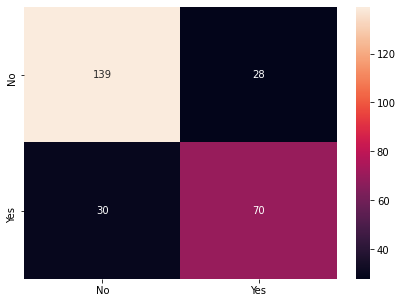

In [155]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')